In [1]:
import pandas as pd

import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('heart.csv')

In [3]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


# 1.Data Cleaning

In [4]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [5]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [6]:
df.shape

(303, 14)

In [7]:
value_map = {0:'A', 1:'B'}

In [8]:
df['fbs']=df['fbs'].map(value_map)

In [9]:
df.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,B,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,A,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,A,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,A,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,A,1,163,1,0.6,2,0,2,1


# 2.Data Integration

In [10]:
subset1 = df[['age','sex']]

subset1.shape

(303, 2)

In [11]:
subset2 = df[['age','trestbps']]

subset2.shape

(303, 2)

In [12]:
combine = pd.concat([subset1, subset2], axis=1)

combine

,age,sex,age,trestbps
0,63,1,63,145
1,37,1,37,130
2,41,0,41,130
3,56,1,56,120
4,57,0,57,120
...,...,...,...,...
298,57,0,57,140
299,45,1,45,110
300,68,1,68,144
301,57,1,57,130


# 3. Data transformation

In [13]:
from sklearn.preprocessing import LabelEncoder

In [14]:
lb = LabelEncoder()

In [15]:
df['fbs'] = lb.fit_transform(df['fbs'])

df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [16]:
lb.classes_

array(['A', 'B'], dtype=object)

In [17]:
lb.transform(lb.classes_)

array([0, 1])

In [18]:
# from sklearn.preprocessing import OneHotEncoder

In [19]:
# ohc=OneHotEncoder(sparse=False)

# df['fbs'] = df['fbs'].astype('category') 
# df['fbs'] = df['fbs'].cat.codes

In [20]:
# df_ohc=ohc.fit_transform(df[['fbs']])

In [21]:

# data=pd.DataFrame(df_ohc,columns=['yes','no'])


In [22]:
# df=df.join(data)

In [23]:
# df

# 4.Error correction

In [27]:
import numpy as np

In [28]:
median_age = df['age'].median()

In [29]:
df['age'] = np.where( (df['age'] < 0) | (df['age'] > 120), median_age, df['age'])

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt

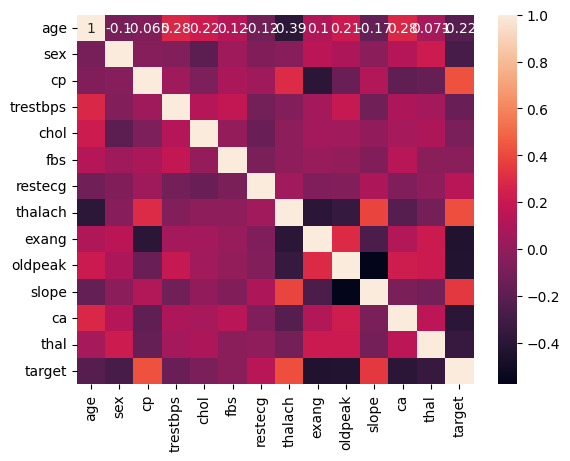

In [31]:
sns.heatmap(df.corr(), annot=True)
plt.show()

# 5.Model building

In [32]:
x = df[['age']]
y = df[['trestbps']]

In [33]:
from sklearn.model_selection import train_test_split

In [34]:
x_train, x_test, y_train, y_test = train_test_split(x , y, test_size=0.2) 

In [35]:
from sklearn.linear_model import LinearRegression

In [36]:
lr = LinearRegression()

In [37]:
model = lr.fit(x_train, y_train)

In [38]:
y_pred = model.predict(x_test)

In [39]:
lr.coef_

array([[0.60804454]])

In [40]:
lr.intercept_

array([99.43021573])

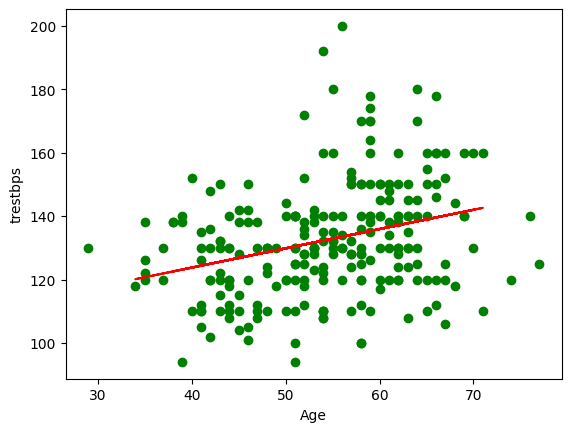

In [41]:
plt.scatter(x_train,y_train,color='green')
plt.plot(x_test,y_pred,color='red')
plt.xlabel("Age")
plt.ylabel("trestbps")

plt.show()

In [42]:
from sklearn import metrics

In [43]:
mse = metrics.mean_squared_error

In [44]:
mse(y_test,y_pred)

240.0269129605017

In [45]:
import math

In [46]:
rmse=math.sqrt(mse(y_test,y_pred))
rmse

15.49280197254524